In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Airline.csv')
df.head()

,Date,Data
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df["Date"]=pd.to_datetime(df["Date"], format="%Y-%m")
df.set_index("Date", inplace=True)

In [4]:
#FEATURE ENGINEERING
df['t-1']=df['Data'].shift(1)
df['t-2']=df['Data'].shift(2)
df['t-3']=df['Data'].shift(3)
df['t+1']=df['Data'].shift(-1)
df['t+2']=df['Data'].shift(-2)
df['t+3']=df['Data'].shift(-3)

In [5]:
df.head()

,Data,t-1,t-2,t-3,t+1,t+2,t+3
Date,,,,,,,
1949-01-01,112,NaN,NaN,NaN,118.0,132.0,129.0
1949-02-01,118,112.0,NaN,NaN,132.0,129.0,121.0
1949-03-01,132,118.0,112.0,NaN,129.0,121.0,135.0
1949-04-01,129,132.0,118.0,112.0,121.0,135.0,148.0
1949-05-01,121,129.0,132.0,118.0,135.0,148.0,148.0


46.50806381693394

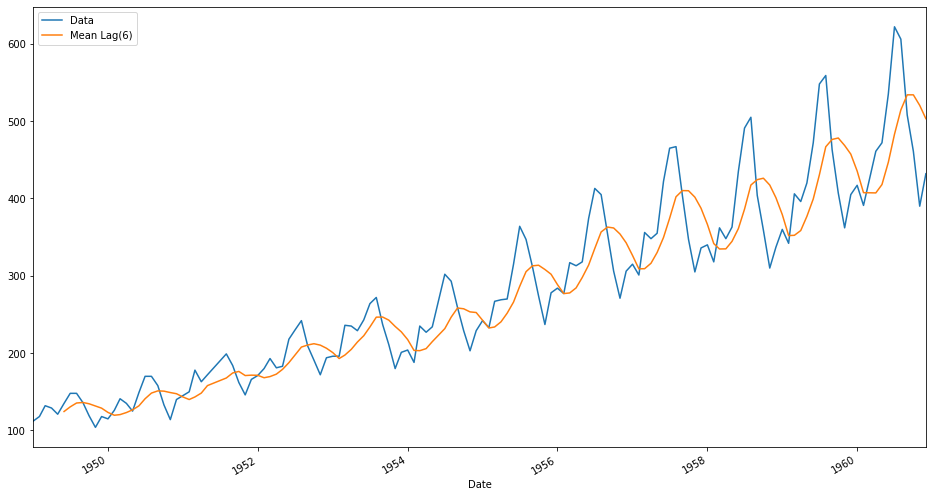

In [6]:
#PREDICTION
df = df.filter(['Data'])
df['Mean Lag(6)']=df['Data'].rolling(6).mean()
df.plot(figsize=(16,9))
rmse=((df['Data']-df['Mean Lag(6)'])**2).mean()**0.5
rmse

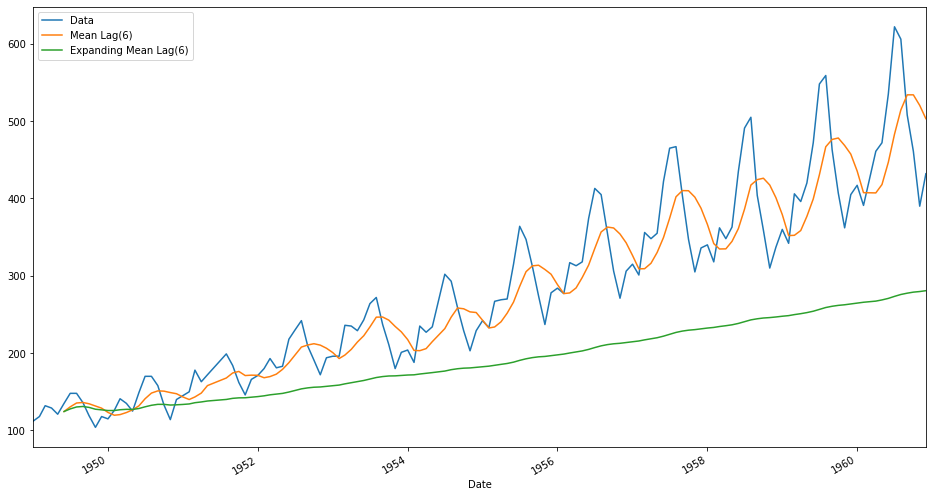

In [7]:
df['Expanding Mean Lag(6)']=df['Data'].expanding(6).mean()
df.plot(figsize=(16,9))

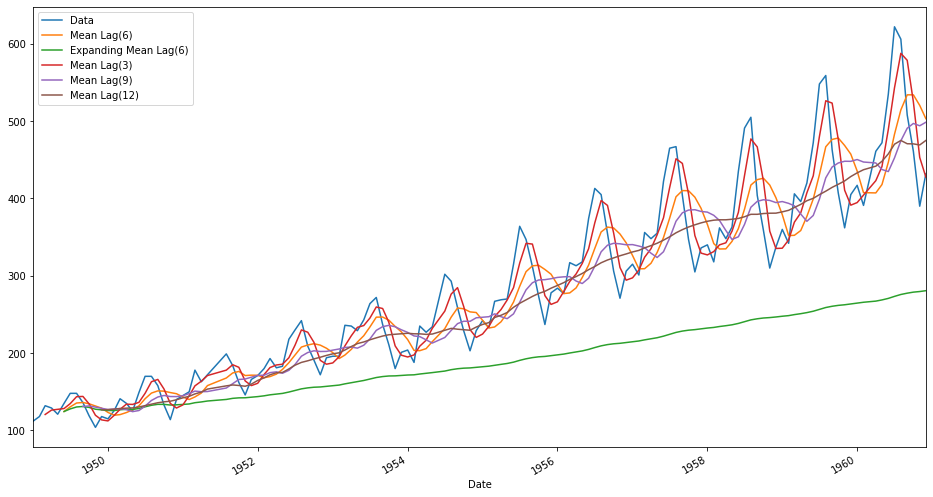

In [8]:
df['Mean Lag(3)']=df['Data'].rolling(3).mean()
df['Mean Lag(9)']=df['Data'].rolling(9).mean()
df['Mean Lag(12)']=df['Data'].rolling(12).mean()
df.plot(figsize=(16,9))

Calculate RMSE | Exponential Smoothing